# 4 Minería de datos sobre Instagram

Visite https://www.instagram.com/developer/ y registre una aplicación: 

https://www.codexworld.com/how-to/register-instagram-app-create-client-id/

How to create Client Id and Client Secret for Instagram ?:
https://www.youtube.com/watch?v=zZ-0U--rPX4

https://github.com/oyvsyo/insta_play/blob/master/analys.ipynb


## Análisis de Instagram con una API no oficial, iPython y matplotlib

https://medium.com/@dvoiak.stepan/https-medium-com-dvoiak-stepan-instagram-analitics-with-unofficial-api-ipython-and-matplotlib-a9f3f8b2b16a

https://github.com/oyvsyo/insta_play/blob/master/analys.ipynb

Ordenar a todos tus seguidores por la cantidad de Me gusta que hicieron. 
Lo haremos utilizando la API de Instagram no oficial y el cuaderno interactivo IPython.

Se usará Python 2.7 para esta tarea, pero en teoría todas las bibliotecas son compatibles con Python 3.5.
Sobre API no oficial

La API oficial de instagram no es muy buena para el análisis, debido a la política del modo Sandbox y Live, por lo que solo jugar no funciona. Afortunadamente, existe la API de Instagram no oficial escrita en python por Pasha Lev. Así que aquí vamos, instálelo mediante un comando que figura en la documentación de repositorio de github (o puede instalarlo manualmente, si lo desea):

$ pip install -e git + https: //github.com/LevPasha/Instagram-API-python.git#egg=InstagramAPI

No hay documentación al respecto, así que hy que estudiar todos los métodos de la clase InstagramAPI del archivo init.py.

In [8]:
import imageio
imageio.plugins.ffmpeg.download()
from moviepy.editor import *

from InstagramAPI import InstagramAPI
import numpy as np
import time

username = 'christiancastro9072'
pwd = 'Alexeev165*'

API = InstagramAPI(username,pwd)
API.login()
time.sleep(2)

Request return 429 error!
{'message': 'Please wait a few minutes before you try again.', 'status': 'fail'}
Request return 405 error!
{'message': '', 'status': 'fail'}
Request return 404 error!
Login success!



In [9]:
API.getProfileData()
API.LastJson.keys()

dict_keys(['user', 'status'])

In [10]:
print (API.LastJson['user'].keys())
my_id = API.LastJson['user']['pk']

dict_keys(['pk', 'username', 'full_name', 'is_private', 'profile_pic_url', 'profile_pic_id', 'is_verified', 'has_anonymous_profile_picture', 'biography', 'external_url', 'reel_auto_archive', 'hd_profile_pic_versions', 'hd_profile_pic_url_info', 'show_conversion_edit_entry', 'allowed_commenter_type', 'phone_number', 'country_code', 'national_number', 'gender', 'email', 'can_link_entities_in_bio', 'trusted_username', 'trust_days'])


In [11]:
API.getUsernameInfo(my_id)
n_media = API.LastJson['user']['media_count']

In [12]:
media_ids = [] # container for all my post's id's
max_id = '' # some times instagram doesn't want to give you id's

# Atención que hay que agregar un / a la división!
for i in range(n_media//18+1): # getUserFeed() returns 18 posts or less
    API.getUserFeed(usernameId=my_id, maxid = max_id)
    media_ids += API.LastJson['items'] # if it's no post's further
    if API.LastJson['more_available']==False: # may be the end of feed
        print ("no more avaliable")            # or just instagram limit's
        break
    max_id = API.LastJson['next_max_id'] # the first id of next iteration step
    print (i, "   next media id = ", max_id, "  ", len(media_ids))
    time.sleep(3)

no more avaliable


In [13]:
print (media_ids[0].keys()) # info about media

dict_keys(['taken_at', 'pk', 'id', 'device_timestamp', 'media_type', 'code', 'client_cache_key', 'filter_type', 'image_versions2', 'original_width', 'original_height', 'user', 'can_viewer_reshare', 'caption_is_edited', 'direct_reply_to_author_enabled', 'comment_likes_enabled', 'comment_threading_enabled', 'has_more_comments', 'max_num_visible_preview_comments', 'preview_comments', 'can_view_more_preview_comments', 'comment_count', 'inline_composer_display_condition', 'like_count', 'has_liked', 'top_likers', 'likers', 'photo_of_you', 'caption', 'fb_user_tags', 'can_viewer_save', 'organic_tracking_token'])


In [14]:


likers = []
m_id = 0
print ("wait %.1f minutes" % (n_media*2/60.))
for i in range(len(media_ids)):
    m_id = media_ids[i]['id']
    API.getMediaLikers(m_id)
    likers += [API.LastJson]
    time.sleep(2)

print ("done!")



wait 0.0 minutes
done!


In [15]:
users = []
for i in likers:
    users += map(lambda x: i['users'][x]['username'], range(len(i['users'])))

# users - all users that likes my media [username]*num_liked_posts(username)
users_set = set(users)
# users_set - unique users that likes my media
print ("all users = ", len(users), "  uniqum users = ", len(users_set))

all users =  0   uniqum users =  0


In [16]:


l_dict = {}
for user in users_set:
    l_dict[user] = users.count(user)  # {username:number_of_liked_posts}



In [17]:


import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import operator


all_pairs = sorted(l_dict.items(), key=operator.itemgetter(1))
n_users = 10 # top 10 users

pairs = all_pairs[-n_users:]

y = map(lambda y: pairs[y][1], range(len(pairs)))
x = map(lambda y: pairs[y][0], range(len(pairs)))



RuntimeError: matplotlib does not support generators as input

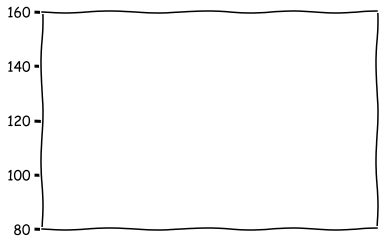

In [18]:
fig = plt.figure()
plt.xkcd()
plt.xticks(range(len(pairs)), x, rotation='vertical')
plt.ylim([80, 160])

# Acá se está generndo un error:
plt.bar(range(len(pairs)), y)

plt.xlabel('USERS')
plt.ylabel('number of liked posts')
plt.show()

TypeError: float() argument must be a string or a number, not 'map'

<Figure size 432x288 with 0 Axes>

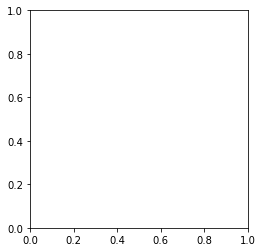

In [11]:
plt.gcf().clear()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = map(lambda i: i/max(y)/10., y)

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
import subprocess
import time
location = 'umami burger'
while True:
    p = subprocess.Popen(["instagram-scraper", "--search-location", location], stdout=subprocess.PIPE)
    output, err = p.communicate()
    if output != "":
        print (output)
    time.sleep(20)

b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


KeyboardInterrupt: 

## Data Mining: Instagram Scraper (1)

https://medium.com/@bruceoh/data-mining-instagram-scraper-1-d557e7ae4264

En algún momento, podemos ver fácilmente que la popularidad de las redes sociales se ha trasladado a Instagram desde Facebook. Analizar las redes sociales nos ayuda a comprender cuáles son las tendencias que las personas siguen actualmente. 

Instagram se concentra en la foto.

Según estos deseos, las imágenes de las redes sociales en Instagram se han convertido en una implicación para los demás. Este deseo particular logró que las personas se mudaran a Instagram. En este punto, me gustaría compartir algo llamado Instagram-Scraper para las personas que quieren estudiar sobre Instagram.

Instagram-Scraper es una herramienta que le permite obtener la mayor parte de la información publicada en Instagram, incluidas fotos, subtítulos y comentarios.

Para obtener más información, siempre puede consultar el sitio web oficial: https://github.com/rarcega/instagram-scraper

La instalación de Instagram Scraper es bastante fácil. 

Desde CMD:

pip install instagram-scraper

y con:





In [ ]:
instagram-scraper -h

podemos ver todas las funciones que tiene instagram-scraper.

Estas funciones de scraper funcionan eficientemente de varias maneras. **Si se está buscando una función en particular, es mejor que el sitio web oficial.**

Pero si se está pensando en trabajar en minería de datos, será mejor tener un script para ejecutarlo porque instagram-scraper proporciona una consulta a la vez. Aunque proporcionan la función para obtener varias fotos de los usuarios con una función de comando, es posible tener diferentes opciones. Entonces, se sugiere para obtener grandes datos de Instagram  usar Python para crear script y asi enviar múltiples consultas.

Aquí hay un ejemplo simple para que el script encuentre los lugares que tienen el nombre "burger king":

In [ ]:
import subprocess
import time
location = 'mc donalds'
while True:
    p = subprocess.Popen(["instagram-scraper", "--search-location", location], stdout=subprocess.PIPE)
    output, err = p.communicate()
    if output != "":
        print (output)
    time.sleep(20)

b'location-id: 839579052884982, title: Mc Donalds, subtitle: 107 Doe Bay Rd, city: , lat: 48.64107, lng: -122.78088\r\nlocation-id: 215633027, title: Mc Donalds - Campolim, subtitle: Avenida Antonio Carlos Comitre, city: , lat: -23.524525834631, lng: -47.464643943469\r\nlocation-id: 350538630, title: Mc Donalds Mathura, subtitle: National Highway 2, Mathura, Uttar Pradesh, city: Mathura, Uttar Pradesh, lat: 27.378506529933, lng: 77.692431816204\r\nlocation-id: 249695011, title: Mc Donalds, subtitle: B-dul Revolutiei, Arad, Arad, city: Arad, Arad, lat: 46.175325948079, lng: 21.318086513078\r\nlocation-id: 308320392, title: Mc Donalds, subtitle: Avenida nove de julho, 1140, Bairro: Jardim Nossa Senhora de Fatima, city: , lat: -21.292238665, lng: -50.348050315\r\n'
b'location-id: 839579052884982, title: Mc Donalds, subtitle: 107 Doe Bay Rd, city: , lat: 48.64107, lng: -122.78088\r\nlocation-id: 215633027, title: Mc Donalds - Campolim, subtitle: Avenida Antonio Carlos Comitre, city: , lat:

In [23]:
instagram-scraper --location-id: 1730212490391916  
--media_metadata

SyntaxError: illegal target for annotation (<ipython-input-23-cfe478bd2653>, line 1)

# Tutorial: Web scraping Instagram’s most precious resource — corgis.

Fuente: https://medium.com/swlh/tutorial-web-scraping-instagrams-most-precious-resource-corgis-235bf0389b0c

In [27]:
import pandas as pd
import time
from selenium.webdriver import Chrome

from selenium import webdriver

In [28]:

browser = webdriver.Chrome('/chromedriver.exe')

# Nos dirigimos a la página de linkedin e ingresamos automáticamente leyendo nuestras 
# credenciales desde el archivo config.txt:
browser.get('https://www.instagram.com/')




In [26]:
#Retrieve every link from a page
browser.find_elements_by_tag_name('a')# Retrieve a link from a page that has "likes" in its text
browser.find_element_by_partial_link_text('likes')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"partial link text","selector":"likes"}
  (Session info: chrome=80.0.3987.132)
  (Driver info: chromedriver=80.0.3987.106 (f68069574609230cf9b635cd784cfb1bf81bb53a-refs/branch-heads/3987@{#882}),platform=Windows NT 10.0.18362 x86_64)


# 2. Obteniendo los 25 enlaces de publicaciones más recientes.

Para comenzar, vamos a escribir cada función y probarlas en uno de mis mejores perros: Sneakers the Corgi (136k seguidores). Aquí hay una función escrita que, con la entrada del nombre de usuario, devolverá una lista de las URL de las 25 publicaciones más recientes para una cuenta:

In [1]:
def recent_25_posts(sneakersthecorgi):
    """With the input of an account page, scrape the 25 most recent posts urls"""
    url = "https://www.instagram.com/" + username + "/"
    browser = Chrome()
    browser.get(url)
    post = 'https://www.instagram.com/p/'
    post_links = []
    while len(post_links) < 25:
        links = [a.get_attribute('href') for a in browser.find_elements_by_tag_name('a')]
        for link in links:
            if post in link and link not in post_links:
                post_links.append(link)
        scroll_down = "window.scrollTo(0, document.body.scrollHeight);"
        browser.execute_script(scroll_down)
        time.sleep(10)
    else:
        return post_links[:25]